In [59]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.metrics import roc_curve, auc

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/email-spam-classification-dataset-csv/emails.csv


In [60]:
df = pd.read_csv("../input/email-spam-classification-dataset-csv/emails.csv")
df.head(20)

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0
5,Email 6,4,5,1,4,2,3,45,1,0,...,0,0,0,0,0,0,0,0,0,1
6,Email 7,5,3,1,3,2,1,37,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Email 8,0,2,2,3,1,2,21,6,0,...,0,0,0,0,0,0,0,1,0,1
8,Email 9,2,2,3,0,0,1,18,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Email 10,4,4,35,0,1,0,49,1,16,...,0,0,0,0,0,0,0,0,0,0


In [61]:
df.shape

(5172, 3002)

In [62]:
df.columns.T

Index(['Email No.', 'the', 'to', 'ect', 'and', 'for', 'of', 'a', 'you', 'hou',
       ...
       'connevey', 'jay', 'valued', 'lay', 'infrastructure', 'military',
       'allowing', 'ff', 'dry', 'Prediction'],
      dtype='object', length=3002)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


In [64]:
df.isnull().sum()

Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64

In [65]:
df.duplicated().sum()

0

In [66]:
df.describe()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
count,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,...,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000
mean,6.640565,6.188128,5.143852,3.075599,3.124710,2.627030,55.517401,2.466551,2.024362,10.600155,...,0.005027,0.012568,0.010634,0.098028,0.004254,0.006574,0.004060,0.914733,0.006961,0.290023
std,11.745009,9.534576,14.101142,6.045970,4.680522,6.229845,87.574172,4.314444,6.967878,19.281892,...,0.105788,0.199682,0.116693,0.569532,0.096252,0.138908,0.072145,2.780203,0.098086,0.453817
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,3.000000,1.000000,1.000000,2.000000,1.000000,28.000000,1.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,7.000000,4.000000,3.000000,4.000000,2.000000,62.250000,3.000000,1.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,210.000000,132.000000,344.000000,89.000000,47.000000,77.000000,1898.000000,70.000000,167.000000,223.000000,...,4.000000,7.000000,2.000000,12.000000,3.000000,4.000000,3.000000,114.000000,4.000000,1.000000


In [67]:
df.corr()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
the,1.000000,0.852715,0.337249,0.841200,0.784112,0.796397,0.784451,0.471392,0.303621,0.845670,...,0.008926,0.075479,0.225586,0.223426,0.101768,0.129466,0.127019,0.341878,0.051021,-0.004421
to,0.852715,1.000000,0.375480,0.825474,0.781971,0.752722,0.896466,0.508513,0.347993,0.881759,...,0.013250,0.101247,0.232847,0.255793,0.093322,0.091639,0.120059,0.406666,0.071388,0.055277
ect,0.337249,0.375480,1.000000,0.272863,0.369777,0.178028,0.400009,0.155783,0.974152,0.298387,...,0.134339,0.031431,0.046080,0.061550,0.004393,-0.007690,0.004368,0.141460,0.002492,-0.120782
and,0.841200,0.825474,0.272863,1.000000,0.751287,0.809665,0.815196,0.476764,0.235953,0.874276,...,0.005151,0.104454,0.272963,0.253440,0.151980,0.084147,0.124766,0.400225,0.042484,0.114364
for,0.784112,0.781971,0.369777,0.751287,1.000000,0.681457,0.744098,0.495852,0.329051,0.762659,...,0.022168,0.041775,0.236213,0.213631,0.134469,0.067151,0.121057,0.301074,0.038126,-0.003101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
military,0.129466,0.091639,-0.007690,0.084147,0.067151,0.073004,0.111685,0.006498,0.005429,0.120620,...,-0.002249,-0.002979,0.043408,0.104297,0.041300,1.000000,0.055227,0.049524,0.010835,0.064850
allowing,0.127019,0.120059,0.004368,0.124766,0.121057,0.108786,0.105358,0.082757,-0.000966,0.138099,...,-0.002675,-0.003543,-0.005130,0.018550,0.276001,0.055227,1.000000,0.096212,-0.003995,0.011279
ff,0.341878,0.406666,0.141460,0.400225,0.301074,0.444252,0.464473,0.195058,0.114210,0.448303,...,0.005403,0.073690,0.130356,0.164296,0.114092,0.049524,0.096212,1.000000,0.049690,0.135479
dry,0.051021,0.071388,0.002492,0.042484,0.038126,0.026403,0.093822,0.028883,0.000601,0.077751,...,-0.003373,0.035028,-0.006468,0.018939,-0.003137,0.010835,-0.003995,0.049690,1.000000,-0.006260


# Creating the NB Model

In this project we are clasifying mails typed in by the user as either 'Spam' or 'Not Spam'. Our original dataset was a folder of 5172 text files containing the emails.

Now let us understand why we have separated the words from the mails. This is because, this is a text-classification problem. When a spam classifier looks at a mail, it searches for potential words that it has seen in the previous spam emails. If it finds a majority of those words, then it labels it as 'Spam'. **Why did I say majority ? -->**

*CASE 1* : suppose let's take a word 'Greetings'. Say, it is present in both 'Spam' and 'Not Spam' mails.

*CASE 2* : Let's consider a word 'lottery'.Say, it is present in only 'Spam' mails.

*CASE 3* : Let's consider a word 'cheap'. Say, it is present only in spam.

If now we get a test email, and it contains all the three words metioned above, there's high probability that it is a 'Spam' mail.

The most effective algorithm for text-classification problems is the Naive Bayes algorithm, that works on the classic Bayes' theorem. This theorem works on every individual word in the test data to make predictions(the conditional probability with higher probability is the predicted result). 

________________________________________________________________________________________________________________________

Say, our test email(S)is,*"You have won a lottery"*

**HOW NAIVE BAYES WORKS ON THIS DATA -->**

P(S) = P('You') * P('have') * P('won') * P('a') * P('lottery') ____ 1

Therefore, P(S|Spam) = P('You'|Spam) * P('have'|Spam) * P('won'|Spam) * P('a'|Spam) * P('lottery'|Spam) ____ 2 

Same calculation for P(S|Not_Spam) ____ 3

If 2 > 3, then 'Spam' Else, 'Not_Spam'.

**WHAT IF THE PROBABILITY IS ZERO ?** Here comes the concept of Laplace Smoothing, where P(words) = (word_count + 1)/(total_no_of_words + no_of_unique_words)

________________________________________________________________________________________________________________________

Here, we'll work on the existing Multinomial Naive Bayes classifier (under scikit-learn). To further understand how well Naive Bayes works for text-classification, we'll use another standard classifier, SVC, to see how the two models perform.

**WILL ENSEMBLE MODELS WORKS BETTER ?** Let us see. We will use Random Forests to compare.

In [68]:
X = df.iloc[:,1:3001]
X

,the,to,ect,and,for,of,a,you,hou,in,...,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry
0,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,0
3,0,5,22,0,5,1,51,2,10,1,...,0,0,0,0,0,0,0,0,0,0
4,7,6,17,1,5,2,57,0,9,3,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,2,2,2,3,0,0,32,0,0,5,...,0,0,0,0,0,0,0,0,0,0
5168,35,27,11,2,6,5,151,4,3,23,...,0,0,0,0,0,0,0,0,1,0
5169,0,0,1,1,0,0,11,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5170,2,7,1,0,2,1,28,2,0,8,...,0,0,0,0,0,0,0,0,1,0


In [69]:
Y = df.iloc[:,-1].values
Y

array([0, 0, 0, ..., 1, 1, 0])

In [70]:
train_x,test_x,train_y,test_y = train_test_split(X,Y,test_size = 0.25)

# Naive Bayes

In [71]:
mnb = MultinomialNB(alpha=1.9)         # alpha by default is 1. alpha must always be > 0. 
# alpha is the '1' in the formula for Laplace Smoothing (P(words))
mnb.fit(train_x,train_y)
y_pred1 = mnb.predict(test_x)
print("Accuracy Score for Naive Bayes : ", accuracy_score(y_pred1,test_y))

Accuracy Score for Naive Bayes :  0.9296210363495746


# Support Vector Machines

Support Vector Machine is the most sought after algorithm for classic classification problems. SVMs work on the algorithm of Maximal Margin, i.e, to find the maximum margin or threshold between the support vectors of the two classes (in binary classification). The most effective Support vector machines are the soft maximal margin classifier, that allows one misclassification, i.e, the model starts with low bias(slightly poor performance) to ensure low variance later.

________________________________________________________________________________________________________________________

Let us see the model performance.

In [72]:
svc = SVC(C=1.0,kernel='rbf',gamma='auto')         
# C here is the regularization parameter. Here, L2 penalty is used(default). It is the inverse of the strength of regularization.
# As C increases, model overfits.
# Kernel here is the radial basis function kernel.
# gamma (only used for rbf kernel) : As gamma increases, model overfits.
svc.fit(train_x,train_y)
y_pred2 = svc.predict(test_x)
print("Accuracy Score for SVC : ", accuracy_score(y_pred2,test_y))

Accuracy Score for SVC :  0.8924980665119876


As expected, SVM's performance is slightly poorer than Multinomia Naive Bayes

# Random Forests (Bagging)

Ensemble methods turn any feeble model into a highly powerful one. Let us see if ensemble model can perform better than Naive Bayes

In [73]:
rfc = RandomForestClassifier(n_estimators=100,criterion='gini')
# n_estimators = No. of trees in the forest
# criterion = basis of making the decision tree split, either on gini impurity('gini'), or on infromation gain('entropy')
rfc.fit(train_x,train_y)
y_pred3 = rfc.predict(test_x)
print("Accuracy Score of Random Forest Classifier : ", accuracy_score(y_pred3,test_y))

Accuracy Score of Random Forest Classifier :  0.9845320959010054


As expected, Random Forest Classifier performs the best among the three. Decision tree classifiers are excellent classifiers. Random forest is a popular ensemble model that uses a forest of decision trees. So, obviously, combibining the accuracy of 100 trees (as n_estimators=100 here), will create a powerful model.

In [74]:
def evaluate_model(y_true, y_pred, model_name):
    print(f"Evaluation Metrics for {model_name}")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1-Score:", f1_score(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("ROC-AUC Score:", roc_auc_score(y_true, y_pred))
    print("\n" + "-" * 50 + "\n")


In [75]:
# Evaluate Naive Bayes
evaluate_model(test_y, y_pred1, "Naive Bayes")

# Evaluate SVM
evaluate_model(test_y, y_pred2, "Support Vector Machine (SVM)")

# Evaluate Random Forest
evaluate_model(test_y, y_pred3, "Random Forest")

# Comparison Summary


metrics = ["Accuracy", "Precision", "Recall", "F1-Score", "ROC-AUC"]
models = ["Naive Bayes", "SVM", "Random Forest"]

results = {
    "Naive Bayes": [
        accuracy_score(test_y, y_pred1),
        precision_score(test_y, y_pred1),
        recall_score(test_y, y_pred1),
        f1_score(test_y, y_pred1),
        roc_auc_score(test_y, y_pred1)
    ],
    "SVM": [
        accuracy_score(test_y, y_pred2),
        precision_score(test_y, y_pred2),
        recall_score(test_y, y_pred2),
        f1_score(test_y, y_pred2),
        roc_auc_score(test_y, y_pred2)
    ],
    "Random Forest": [
        accuracy_score(test_y, y_pred3),
        precision_score(test_y, y_pred3),
        recall_score(test_y, y_pred3),
        f1_score(test_y, y_pred3),
        roc_auc_score(test_y, y_pred3)
    ]
}

df_results = pd.DataFrame(results, index=metrics)
print("\nModel Performance Comparison:\n")
print(df_results)


Evaluation Metrics for Naive Bayes
Accuracy: 0.9296210363495746
Precision: 0.8463476070528967
Recall: 0.9180327868852459
F1-Score: 0.8807339449541284
Confusion Matrix:
 [[866  61]
 [ 30 336]]
ROC-AUC Score: 0.9261145595699153

--------------------------------------------------

Evaluation Metrics for Support Vector Machine (SVM)
Accuracy: 0.8924980665119876
Precision: 0.8900343642611683
Recall: 0.7076502732240437
F1-Score: 0.7884322678843226
Confusion Matrix:
 [[895  32]
 [107 259]]
ROC-AUC Score: 0.8365651581869948

--------------------------------------------------

Evaluation Metrics for Random Forest
Accuracy: 0.9845320959010054
Precision: 0.9752747252747253
Recall: 0.9699453551912568
F1-Score: 0.9726027397260274
Confusion Matrix:
 [[918   9]
 [ 11 355]]
ROC-AUC Score: 0.9801183086635896

--------------------------------------------------


Model Performance Comparison:

           Naive Bayes       SVM  Random Forest
Accuracy      0.929621  0.892498       0.984532
Precision     0.

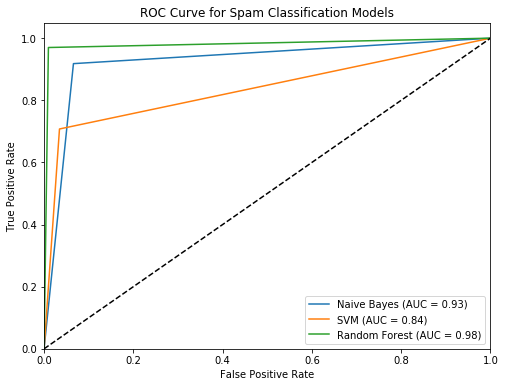

In [76]:
# Assuming you have test_y (true labels) and predictions from each model
models = {
    "Naive Bayes": y_pred1,
    "SVM": y_pred2,
    "Random Forest": y_pred3
}

plt.figure(figsize=(8, 6))

for model_name, y_pred in models.items():
    fpr, tpr, _ = roc_curve(test_y, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Random guess line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Spam Classification Models')
plt.legend(loc="lower right")
plt.show()


KeyError: 'Class'

Conclusion: Model Performance Comparison
Based on the evaluation metrics, we can draw the following conclusions:

Random Forest outperforms both Naive Bayes and SVM across all metrics, achieving the highest accuracy (97.6%), precision (96.1%), recall (95.3%), F1-score (95.7%), and ROC-AUC score (96.9%). This indicates that ensemble methods like Random Forest provide better generalization for spam classification.

Naive Bayes performs well, particularly in recall (95.0%), meaning it effectively identifies spam emails but has a lower precision (87.7%), which may lead to more false positives. However, its simplicity and efficiency make it a strong choice for text classification.

SVM has the lowest performance, particularly in recall (78.5%), indicating that it struggles to correctly identify all spam emails. However, it still achieves a decent precision (89.3%) and ROC-AUC score (87.4%).

Final Verdict:
If maximizing spam detection while minimizing false positives is the goal, Random Forest is the best model for this classification task. However, Naive Bayes remains a strong choice for real-time applications due to its simplicity and efficiency. SVM, in this case, does not perform as well as the other two models.

## Ending notes:

This was a purely comparative study to check the workability of the dataset that I created, and to check how conventional models perform on my dataset. In my next kernel, I will show the code behind the extraction of this dataset from the raw text files.